In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10, (2 * (i//2) * np.pi*2/d_model) / np.float32(d_model))
    print(2 * (i//2)/d_model)
    return pos * angle_rates 

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding = angle_rads[np.newaxis, ...]
    
    return pos_encoding

[[0.    0.    0.125 0.125 0.25  0.25  0.375 0.375 0.5   0.5   0.625 0.625
  0.75  0.75  0.875 0.875]]
(1, 16, 16)


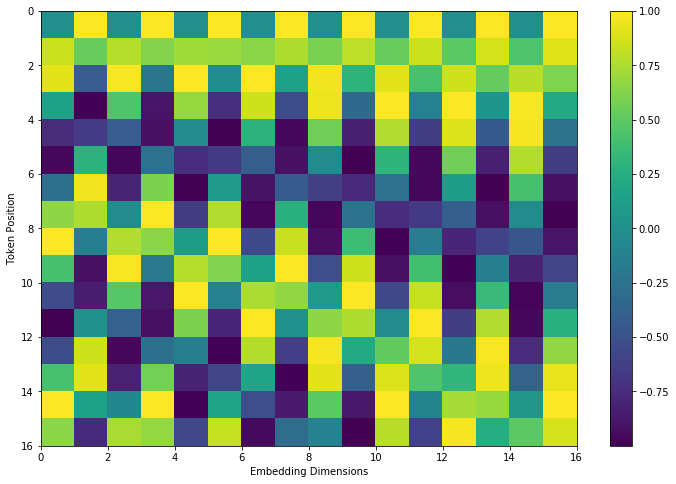

In [3]:
dim = 16

pe = positional_encoding(dim,dim)
print (pe.shape)


plt.figure(figsize=(12,8))
plt.pcolormesh(pe[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dim))
plt.ylim((dim,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()



In [4]:
for i in range(16):
    print(np.dot(pe[0,:,i],pe[0,:,i]))

7.870039090063012
8.129960909936989
7.572142808660617
8.427857191339385
7.887582375295612
8.112417624704388
7.785882742373788
8.21411725762621
7.427013785456012
8.572986214543988
8.18825010538399
7.811749894616009
7.7633580737436025
8.236641926256397
7.181192210028127
8.818807789971874


In [5]:
for i in range(16):
    for j in range(16):
        if i != j:
            print(np.dot(pe[0,:,i],pe[0,:,j]))

-0.11124568128212836
4.933562355901715
5.403081813614329
-0.11375085412070396
5.430038737296988
-2.014964032400617
2.330487069706963
-0.9096436219172459
0.15599849584436865
0.7234915458086811
0.07919603991767155
1.35908737197305
1.1070490053478
0.94566891710047
2.0345917598173036
-0.11124568128212836
-4.746586532575217
4.893284366059254
-4.446472199594979
0.6411480865101031
-2.0028210691193715
-0.8615913394202603
-0.354777059935138
-0.25370277023342175
-0.05867229699609122
0.7037279365357393
-0.43283603163852463
1.1423575514222828
-0.8246872371882012
1.061938619343534
4.933562355901715
-4.746586532575217
0.4683179137365307
4.924564833331535
4.819154906166849
1.010718871524974
5.275341960383386
-1.0955367645179948
3.448504889989629
-1.2363200830828598
1.6100870625785824
-0.5014226642696802
0.7060525622044181
0.22221297188241557
0.6196224473066065
5.403081813614329
4.893284366059254
0.4683179137365307
-4.693932815122966
6.012228871286089
-5.4665040477980975
1.3409382156225038
-3.03093363

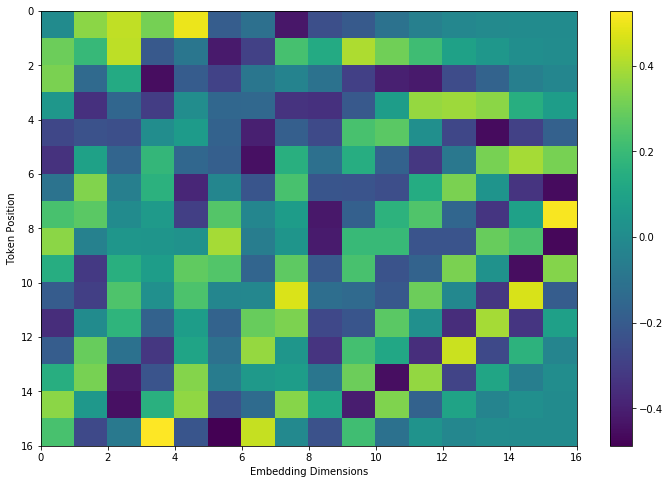

In [6]:
def GS(B):
    u = (B[0,:,0]/np.linalg.norm(B[0,:,0]))[:,np.newaxis]
    for i in range(1,B.shape[1]):
        bi = B[0,:,i][:,np.newaxis]
        ui = bi-np.matmul(np.matmul(np.matmul(u,np.linalg.inv(np.matmul(u.T,u))),u.T),bi)
        #print(ui)
        ui = ui/np.linalg.norm(ui)
        u = np.append(u,ui,axis=1)
    return u[np.newaxis, ...]

pe2 = GS(pe)


plt.figure(figsize=(12,8))
plt.pcolormesh(pe2[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dim))
plt.ylim((dim,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

In [7]:
for i in range(16):
    print(np.dot(pe2[0,:,i],pe2[0,:,i]))

0.9999999999999999
1.0
1.0
1.0
1.0
1.0000000000000002
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0000000000000004
1.0


In [8]:
for i in range(16):
    for j in range(16):
        if i != j:
            print(np.dot(pe2[0,:,i],pe2[0,:,j]))

1.3877787807814457e-17
1.1102230246251565e-16
1.1102230246251565e-16
2.983724378680108e-16
5.967448757360216e-16
5.689893001203927e-16
1.6237011735142914e-15
-9.575673587391975e-16
5.9396931817445875e-15
4.1772141301521515e-14
-3.131384040955254e-13
4.760192240382821e-12
-2.2993329462650536e-11
6.149948258982185e-09
-3.1155422755557716e-09
1.3877787807814457e-17
-5.551115123125783e-17
1.6653345369377348e-16
-7.91033905045424e-16
5.551115123125783e-17
-1.457167719820518e-15
-2.220446049250313e-15
-2.275957200481571e-15
-1.7166823518266483e-14
3.2134017668994375e-14
-1.892930256985892e-13
2.4032165146792295e-11
-6.067235602813525e-11
3.885174459927754e-09
5.562596182284718e-09
1.1102230246251565e-16
-5.551115123125783e-17
6.938893903907228e-18
-5.828670879282072e-16
-1.6653345369377348e-16
-1.2004286453759505e-15
-4.551914400963142e-15
3.524958103184872e-15
-4.496403249731884e-14
1.3283818489639998e-13
-1.5957929422327766e-12
2.1990700926899365e-11
-2.419770633865781e-11
9.28859680837668